# Session 3: Data Structuring 2

*Nicklas Johansen*

## Agenda

In this session, we will work with different types of data:

- Boolean Data
- Numeric Operations and Methods
- String Operations
- Categorical Data
- Time Series Data


### Recap 

- Loading Packages
- Pandas Series
- Pandas Data Frames
- Series vs DataFrames
- Converting Data Types
- Indices and Column Names
- Viewing Series and Dataframes
- Row and Column Selection
- Modifying DataFrames
- Changing the Index
- Changing Column Values
- Sorting Data
- DO2021 COHORT

In [4]:
# Loading packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns


# Boolean Data

## Logical Expression for Series (1:2)
*Can we test an expression for all elements?*

Yes: **==**, **!=** work for a single object or Series with same indices. Example:

In [36]:
print(my_series3)
print()
print(my_series3 == 0)

yesterday    0
today        1
tomorrow     3
dtype: int64

yesterday     True
today        False
tomorrow     False
dtype: bool


What datatype is returned? 


## Logical Expression in Series  (2:2)
*Can we check if elements in a series equal some element in a container?*

Yes, the `isin` method. Example:

In [37]:
my_rng = list(range(2))

print(my_rng)
print()
print(my_series3.isin(my_rng)) 

[0, 1]

yesterday     True
today         True
tomorrow     False
dtype: bool


## Power of Boolean Series (1:2)
*Can we combine boolean Series?*

Yes, we can use:
- the `&` operator (*and*)
- the `|` operator (*or*)

In [6]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
print(((titanic.sex == 'female') & (titanic.age >= 30)).head(3)) # selection by multiple columns

0    False
1     True
2    False
dtype: bool


What datatype was returned? 


## Power of Boolean Series (2:2)
*Why do we care for boolean series (and arrays)?*

Mainly because we can use them to select rows based on their content.

In [39]:
print(my_series3)
print()
print(my_series3[my_series3<3])

yesterday    0
today        1
tomorrow     3
dtype: int64

yesterday    0
today        1
dtype: int64


NOTE: Boolean selection is extremely useful for dataframes!!

# Numeric Operations and Methods

## Numeric Operations (1:3)
*How can we make basic arithmetic operations with arrays, series and dataframes?*

It really works just like with Python data, e.g. lists. An example with squaring:

In [11]:
2 ** 2

4

In [13]:
num_ser1 = pd.Series([2,3,2,1,1])
num_ser2 = num_ser1 ** 2

print(num_ser1)
print(num_ser2)

0    2
1    3
2    2
3    1
4    1
dtype: int64
0    4
1    9
2    4
3    1
4    1
dtype: int64


## Numeric Operations (2:3)
*Are other numeric python operators the same??*

Numeric operators work `/`, `//`, `-`, `*`, `**`  as expected.

So does comparative (`==`, `!=`, `>`, `<`)

*Why is this useful?*

- vectorized operations are VERY fast;
- requires very little code.

In [16]:
10 / 2

5.0

In [15]:
num_ser1 / num_ser1

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

## Numeric  Operations (3:3)
*Can we also do this with vectors of data?*

Yes, we can also do elementwise addition, multiplication, subtractions etc. of series. Example: 

In [41]:
num_ser1 + num_ser2

0     6
1    12
2     6
3     2
4     2
dtype: int64

## Numeric methods (1:4)

*OK, these were some quite simple operations with pandas series. Are there other numeric methods?*

Yes, pandas series and dataframes have other powerful numeric methods built-in. 

Consider an example series of 10 million randomly generated observations:

In [17]:
arr_rand = np.random.randn(10**7) # Draw 10^7 observations from standard normal, arr_rand = np.random.normal(size = 10**7)
s2 = pd.Series(arr_rand) # Convert to pandas series
s2

0          0.235661
1          2.154459
2          0.532722
3         -1.476170
4          1.070634
             ...   
9999995    2.205521
9999996   -0.460142
9999997    1.373303
9999998   -0.363157
9999999   -0.656866
Length: 10000000, dtype: float64

## Numeric methods (2:4)
Now, display the median of this distribution:

In [18]:
s2.median() # Display median

-0.0001796446760472281

Other useful methods include: `mean`, `quantile`, `min`, `max`, `std`, `describe`, `quantile` and many more.

In [19]:
np.round(s2.describe(),2) # Display other characteristics of distribution (rounded)

count    10000000.00
mean            0.00
std             1.00
min            -5.31
25%            -0.67
50%            -0.00
75%             0.67
max             5.79
dtype: float64

## Numeric methods (3:4)
An important method is `value_counts`. This counts number for each observation. Example:

In [20]:
cuts = np.arange(-10, 10, 1) # range from -10 to 10 with intervals of unit size
cats = pd.cut(s2, cuts) # cut into categorical data

In [21]:
cats.value_counts()

(-1, 0]      3416138
(0, 1]       3413528
(1, 2]       1358132
(-2, -1]     1357433
(2, 3]        214111
(-3, -2]      213588
(-4, -3]       13251
(3, 4]         13194
(4, 5]           307
(-5, -4]         306
(-6, -5]           7
(5, 6]             5
(7, 8]             0
(6, 7]             0
(-10, -9]          0
(-9, -8]           0
(-7, -6]           0
(-8, -7]           0
(8, 9]             0
dtype: int64

What is observation in the value_counts output - index or data?

## Numeric methods (4/4)
*Are there other powerful numeric methods?*

Yes: examples include 
- `unique`, `nunique`: the unique elements and the count of unique elements
- `cut`, `qcut`: partition series into bins 
- `diff`: difference every two consecutive observations
- `cumsum`: cumulative sum
- `nlargest`, `nsmallest`: the n largest elements 
- `idxmin`, `idxmax`: index which is minimal/maximal 
- `corr`: correlation matrix

Check [series documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) for more information.

# String Operations

## String Operations (1:3)
*Do the numeric python operators also apply to strings?*

In some cases yes, and this can be done very elegantly! Consider the following example with a series:

In [26]:
names_ser1 = pd.Series(['Nicklas', 'Jacob', 'Preben', 'Laila'])
names_ser1

0    Nicklas
1      Jacob
2     Preben
3      Laila
dtype: object

Now add another string:

In [27]:
names_ser1 + ' works @ SAMF'

0    Nicklas works @ SAMF
1      Jacob works @ SAMF
2     Preben works @ SAMF
3      Laila works @ SAMF
dtype: object

## String Operations (2/3)
*Can two vectors of strings also be combined like as with numeric vectors?*

Fortunately, yes:

In [30]:
names_ser2 = pd.Series(['python', 'something with pyramids', 'resaerch', 'admin'])
names_ser1 + ' teaches ' + names_ser2

0                   Nicklas teaches python
1    Jacob teaches something with pyramids
2                  Preben teaches resaerch
3                      Laila teaches admin
dtype: object

## String Operations (3:3)
*Any other types of vectorized operations with strings?*

Many. In particular, there is a large set of string-specific operation (see `.str`-notation below). Some examples (see table 7-5 in PDA for more - we will revisit in session 5):

In [31]:
names_ser1.str.upper() # works similarly with lower()

0    NICKLAS
1      JACOB
2     PREBEN
3      LAILA
dtype: object

In [33]:
names_ser1.str.contains('k')

0     True
1    False
2    False
3    False
dtype: bool

In [35]:
names_ser1.str[0:2] # We can even do vectorized slicing of strings!

0    Ni
1    Ja
2    Pr
3    La
dtype: object

# Categorical Data

## The Categorical Data Type
*Are string (or object) columns attractive to work with?*

In [53]:
pd.Series(['Pandas', 'series'])

0    Pandas
1    series
dtype: object

No, sometimes the categorical data type is better:
- Use categorical data when many characters are repeated
    - Less storage and faster computations
- You can put some order (structure) on your string data
- It also allows new features:
    - Plots have bars, violins etc. sorted according to category order

## Example of Categorical Data (1:2)

Simulate data:

In [48]:
edu_list = ['BSc Political Science', 'Secondary School'] + ['High School']*2
str_ser = pd.Series(edu_list*10**5)
str_ser

0         BSc Political Science
1              Secondary School
2                   High School
3                   High School
4         BSc Political Science
                  ...          
399995              High School
399996    BSc Political Science
399997         Secondary School
399998              High School
399999              High School
Length: 400000, dtype: object

Option 1: No order

In [43]:
cat_ser = str_ser.astype('category')
cat_ser

0         BSc Political Science
1              Secondary School
2                   High School
3                   High School
4         BSc Political Science
                  ...          
399995              High School
399996    BSc Political Science
399997         Secondary School
399998              High School
399999              High School
Length: 400000, dtype: category
Categories (3, object): ['BSc Political Science', 'High School', 'Secondary School']

## Example of Categorical Data (2:2)

Option 2: Order

In [50]:
edu_cats = ['Secondary School', 'High School', 'BSc Political Science']
cats = pd.Categorical(str_ser, categories=edu_cats, ordered=True)
cat_ser2 = pd.Series(cats, index=str_ser.index)
cat_ser2

0         BSc Political Science
1              Secondary School
2                   High School
3                   High School
4         BSc Political Science
                  ...          
399995              High School
399996    BSc Political Science
399997         Secondary School
399998              High School
399999              High School
Length: 400000, dtype: category
Categories (3, object): ['Secondary School' < 'High School' < 'BSc Political Science']

## Numbers as Categories

It is natural to think of measures in categories, e.g. small and large.

*Can we convert our numerical data to bins in a smart way?*

Yes, there are two methods that are useful (and you just applied one of them earlier in this session!):
- `cut` which divides data by user specified bins
- `qcut` which divides data by user specified quantiles
    - E.g. median, $q=0.5$; lower quartile threshold, $q=0.25$; etc.

In [57]:
cat_ser3 = pd.qcut(pd.Series(np.random.normal(size = 10**6)), q = [0,0.025, 0.975, 1])
cat_ser3.cat.categories

IntervalIndex([(-4.602, -1.963], (-1.963, 1.96], (1.96, 4.448]], dtype='interval[float64, right]')

In [58]:
cat_ser3.cat.codes.head(5)

0    1
1    1
2    1
3    1
4    1
dtype: int8

## Converting to Numeric and Binary

For regression, we often want our string / categorical variable as dummy variables:
- That is, all categories have their own binary column (0 and 1)
    - Note: We may leave one 'reference' category out here (intro statistics)
- Rest as numeric

*How can we do this?*

Insert dataframe, `df`, into the function as `pd.get_dummies(df)`

In [59]:
pd.get_dummies(cat_ser3).head(5)

,"(-4.602, -1.963]","(-1.963, 1.96]","(1.96, 4.448]"
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


# Time Series Data

## Temporal Data Type

*Why is time so fundamental?*

Every measurement made by a human was made at some point in time - therefore, it has a "timestamp"!

## Formats for Time

*How are time stamps measured?*

1. **Datetime** (ISO 8601): Standard calendar
    - year, month, day (minute, second, milisecond); timezone
    - can come as string in raw data
2. **Epoch time**: Seconds since January 1, 1970 - 00:00, GMT (Greenwich time zone)
    - nanoseconds in pandas

## Time Data in Pandas

*Does Pandas store it in a smart way?*

Pandas and numpy have native support for temporal data combining datetime and epoch time.

In [53]:
str_ser2 = pd.Series(['20210101', '20210727', '20210803', '20211224'])
dt_ser = pd.to_datetime(str_ser2)
dt_ser

0   2021-01-01
1   2021-07-27
2   2021-08-03
3   2021-12-24
dtype: datetime64[ns]

## Example of Passing Temporal Data

*How does the input type matter for how time data is passed?*

A lot! As we will see, `to_datetime()` may assume either *datetime* or *epoch time* format:

In [54]:
pd.to_datetime(str_ser2)

0   2021-01-01
1   2021-07-27
2   2021-08-03
3   2021-12-24
dtype: datetime64[ns]

In [55]:
pd.to_datetime(str_ser2.astype(int))

0   1970-01-01 00:00:00.020210101
1   1970-01-01 00:00:00.020210727
2   1970-01-01 00:00:00.020210803
3   1970-01-01 00:00:00.020211224
dtype: datetime64[ns]

## Time Series Data

*Why are temporal data powerful?*

We can easily make and plot time series. Example of $\sim$40 years of Apple stock prices:
- Tip: Install in terminal using: *pip install yfinance* in Anaconda Prompt

In [58]:
! pip install yfinance

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Apple Stock Price')

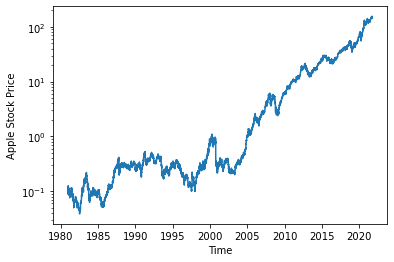

In [57]:
import yfinance as yf

plt.plot(yf.download("AAPL", data_source='yahoo')['Adj Close'])
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')

## Time Series Components

*What is within the series that we just donwloaded? What is a time series*

In [59]:
aapl = yf.download("AAPL", data_source='yahoo')['Adj Close']
aapl.head(5)

[*********************100%***********************]  1 of 1 completed


Date
1980-12-12    0.100600
1980-12-15    0.095352
1980-12-16    0.088353
1980-12-17    0.090540
1980-12-18    0.093165
Name: Adj Close, dtype: float64

In [60]:
aapl.head(5).index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

So in essence, time series in pandas are often just series of data with a time index.

## Pandas and Time Series

*Why is pandas good at handling and processing time series data?*

It has specific tools for resampling and interpolating data:
- See 11.3, 11.5 and 11.6 in PDA textbook

## Datetime in Pandas

*What other uses might time data have?*

We can extract data from datetime columns. These columns have the `dt` and its sub-methods. Example:

In [61]:
dt_ser2 = pd.Series(aapl.index)
dt_ser2.dt.month #also year, weekday, hour, second

0        12
1        12
2        12
3        12
4        12
         ..
10276     9
10277     9
10278     9
10279     9
10280     9
Name: Date, Length: 10281, dtype: int64

Many other useful features (e.g. aggregation over time into means, medians, etc.)

## Associated Readings

PDA, section 5.3: Descriptive statistics and numerical methods

PDA, chapter 7:
- Handling missing data
- Data transformations (duplicates, dummies, binning, etc.)
- String manipulations

PDA, sections 11.1-11.2:
- Dates and time in Python
- Working with time series in pandas (time as index)

PDA, sections 12.1, 12.3:
- Working with categorical data in pandas
- Method chaining

PML, chapter 4, section 'Handling categorical data':
- Encoding class labels with `LabelEncoder`
- One-hot encoding

## session_3_exercises.ipynb
Can be found on github today 15:15. 
- Method 1: sync your cloned repo
- Method 2: download from git repo